In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from Lineaire.Linear import *
from Loss.MSELoss import *


from utils import tools

# Chargement du dataset 

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = np.reshape(diabetes_y[:-20], (-1,1))
diabetes_y_test = np.reshape(diabetes_y[-20:], (-1,1))

dim_input = diabetes_X_train.shape[1] #==1, pour faire de la régression 2D
dim_output = 1  #len(diabetes_y_train.shape) == 1

## Standardisation des données

In [3]:
# Lors de la standardisation des données, il faut le faire en fonction de la distribution des données d'entrainement,
# que ce soit pour le dataset de train ou de test
# https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn

scalerX = StandardScaler()
scalerX.fit(diabetes_X_train)

diabetes_X_train_scaled = scalerX.transform(diabetes_X_train)
diabetes_X_test_scaled = scalerX.transform(diabetes_X_test)

scalerY = StandardScaler()
scalerY.fit(diabetes_y_train)

diabetes_y_train_scaled = scalerY.transform(diabetes_y_train)
diabetes_y_test_scaled = scalerY.transform(diabetes_y_test)

# Execution pas à pas

## Affichage des données et passe forward

     name  input_dim  output_dim
0  Linear          1           1
     name                parametres gradient
0  Linear  [[-0.05877251311495857]]  [[0.0]]


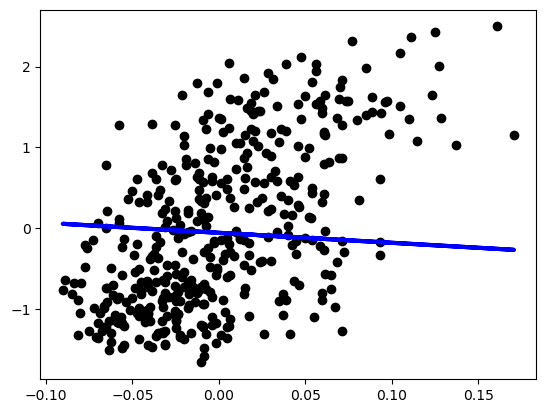

In [6]:
diabetes_y_train_scaled = np.reshape(diabetes_y_train_scaled, (-1,1))
plt.scatter(diabetes_X_train, diabetes_y_train_scaled, color="black")

couche_lineaire = Linear(dim_input, dim_output, init_type=2)
couche_lineaire.describe_shape()
couche_lineaire.describe_values()
output = couche_lineaire.forward(diabetes_X_train_scaled)
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

## Passe backward

### Cout

In [20]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train_scaled, output)
print(f"{cout.mean()=}")

gradient_loss = mseloss.backward(diabetes_y_train_scaled, output) # le premier delta du backward
print(f"gradient loss p.r aux sorties: {gradient_loss}")

cout.mean()=1.074955845554926
gradient loss p.r aux sorties: [[-2.07504678e-01]
 [ 2.04280579e+00]
 [ 9.44036859e-02]
 [-1.45269199e+00]
 [ 4.49658885e-01]
 [ 1.44569571e+00]
 [ 3.98487457e-01]
 [ 2.23151809e+00]
 [ 8.55676987e-01]
 [-4.27466810e+00]
 [ 1.44846008e+00]
 [ 2.02801030e+00]
 [-7.09952207e-01]
 [-9.32095647e-01]
 [ 8.63867956e-01]
 [-5.29124478e-01]
 [-5.48553347e-01]
 [ 9.64769610e-02]
 [ 1.37115313e+00]
 [-4.51330697e-01]
 [ 2.23763578e+00]
 [ 2.64513820e+00]
 [ 2.10718626e+00]
 [-2.64238090e+00]
 [-9.99342618e-01]
 [-1.34630472e+00]
 [ 4.98961302e-01]
 [ 1.50928296e+00]
 [ 5.16112633e-01]
 [-3.46271020e+00]
 [ 4.05578808e-01]
 [ 2.49231501e+00]
 [-5.29151598e+00]
 [ 1.72896843e+00]
 [ 2.33140297e+00]
 [ 1.29207929e+00]
 [-3.06782787e+00]
 [-3.32378714e+00]
 [-2.85052207e+00]
 [ 1.49144054e+00]
 [ 1.28803488e+00]
 [ 2.60136452e+00]
 [ 2.30467849e+00]
 [ 1.53275625e+00]
 [-3.02405418e+00]
 [ 2.57335998e+00]
 [-1.03779183e+00]
 [ 3.58656061e-01]
 [ 2.01884567e+00]
 [ 1.430

### Mise à jour des paramètres

In [21]:
couche_lineaire.zero_grad()
couche_lineaire.backward_update_gradient(diabetes_X_train_scaled, delta=gradient_loss)
print(f'gradient: {couche_lineaire._gradient}')
#couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)
couche_lineaire.update_parameters(gradient_step=1e-3)
print(f'parametres: {couche_lineaire._parameters}')

gradient: [[-538.20000452]]
parametres: [[0.47942749]]


## Re-Passe forward

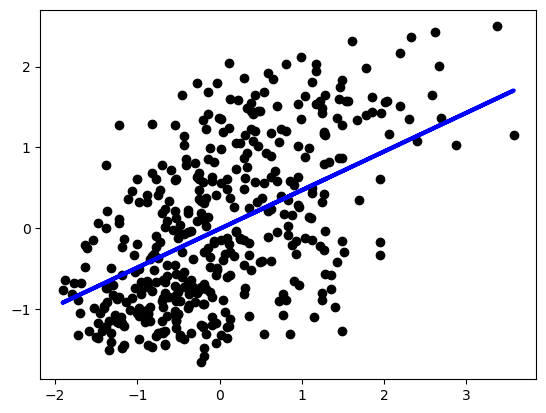

In [22]:
output2 = couche_lineaire.forward(diabetes_X_train_scaled)
plt.scatter(diabetes_X_train_scaled, diabetes_y_train_scaled, color="black")
plt.plot(diabetes_X_train_scaled, output2, color="blue", linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

In [23]:
mseloss = MSELoss()
cout = mseloss.forward(diabetes_y_train_scaled, output)
print(f"{cout.mean()=}")


cout.mean()=1.074955845554926


# Boucle d'apprentissage

In [7]:
couts = []
def train(couche_lineaire, X_train, y_train, nb_iter, eps, print_every=None):
    for i in range(nb_iter):
        output = couche_lineaire.forward(X_train)
        
        mseloss = MSELoss()
        cout = mseloss.forward(y_train, output)
        couts.append(cout.mean())
        if (print_every is not None) and (i % print_every == 0):
            print(cout.mean())
            couche_lineaire.describe_values()
            print('###################')
        
        gradient_loss = mseloss.backward(y_train, output) # le premier delta du backward
        couche_lineaire.zero_grad()
        couche_lineaire.backward_update_gradient(X_train, delta=gradient_loss)
        couche_lineaire.update_parameters(gradient_step=eps)
    return couche_lineaire

In [8]:
couche_lineaire.reset()
couts=[]
couche_lineaire = train(couche_lineaire, diabetes_X_train_scaled, diabetes_y_train_scaled, nb_iter=10, eps=1e-3, print_every=2)

15.781809093743888
     name              parametres gradient
0  Linear  [[-3.308701518940876]]  [[0.0]]
###################
0.6738216196076099
     name               parametres                 gradient
0  Linear  [[0.48429641982548766]]  [[-511.85785332833234]]
###################
0.6648740515691707
     name              parametres                 gradient
0  Linear  [[0.5766028176633057]]  [[-12.456572718598256]]
###################
0.6648687524534587
     name              parametres                 gradient
0  Linear  [[0.5788491861610868]]  [[-0.3031431536798337]]
###################
0.6648687493151056
     name              parametres                   gradient
0  Linear  [[0.5789038537848489]]  [[-0.007377291787960871]]
###################


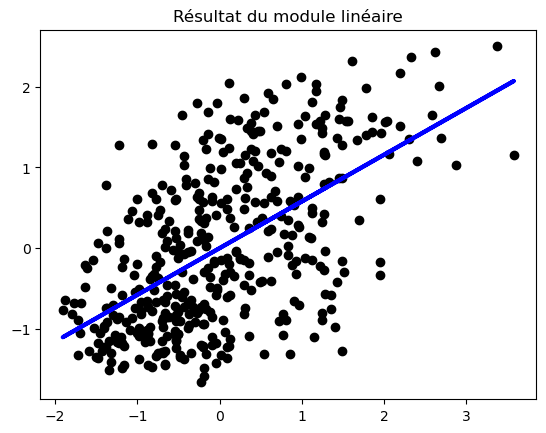

In [17]:
output2 = couche_lineaire.forward(diabetes_X_train_scaled)
plt.scatter(diabetes_X_train_scaled, diabetes_y_train_scaled, color="black")
plt.plot(diabetes_X_train_scaled, output2, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.title("Résultat du module linéaire")
plt.show()


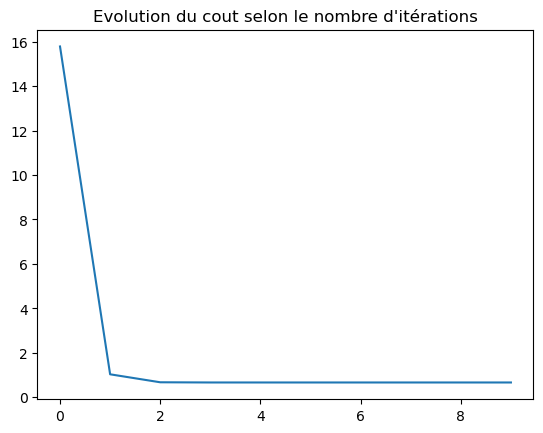

In [18]:
plt.plot(np.arange(len(couts)), couts)
plt.title("Evolution du cout selon le nombre d'itérations")
plt.show()

# Dataset de test

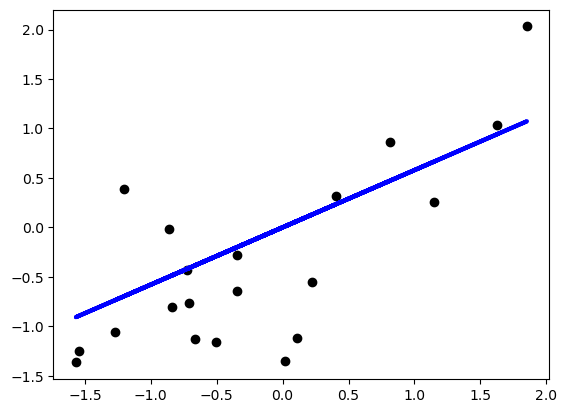

cout: [8.30038035e-03 1.02956718e-01 4.59402873e-01 2.33430210e-01
 1.08628518e-04 1.39883438e+00 9.18426629e-01 1.30061425e-01
 1.17018724e+00 5.62351169e-01 1.69325372e-01 1.01186820e-01
 1.85956578e+00 7.52750488e-01 2.10520812e-01 7.39827722e-03
 1.94275244e-01 6.04179952e-03 1.55680917e-01 1.26199874e-01]
Coefficient of determination: 0.47


In [39]:
output_test = couche_lineaire.forward(diabetes_X_test_scaled)
plt.scatter(diabetes_X_test_scaled, diabetes_y_test_scaled, color="black")
plt.plot(diabetes_X_test_scaled, output_test, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()
print(f'cout: {mseloss.forward(diabetes_y_test_scaled, output_test)}')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test_scaled, output_test))


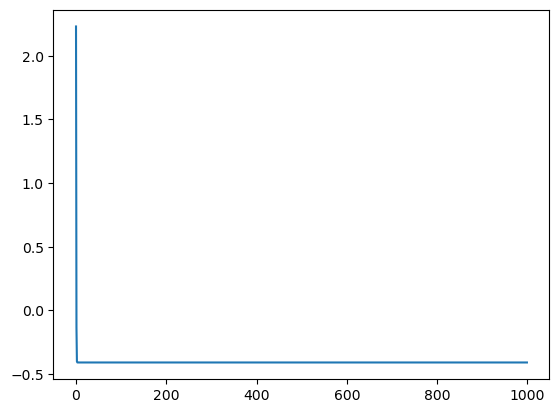

In [13]:
plt.plot( np.arange(len(couts)) , np.log(couts))

# Classification binaire

C:\Users\mouni\AppData\Local\Temp\ipykernel_1972\522194279.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


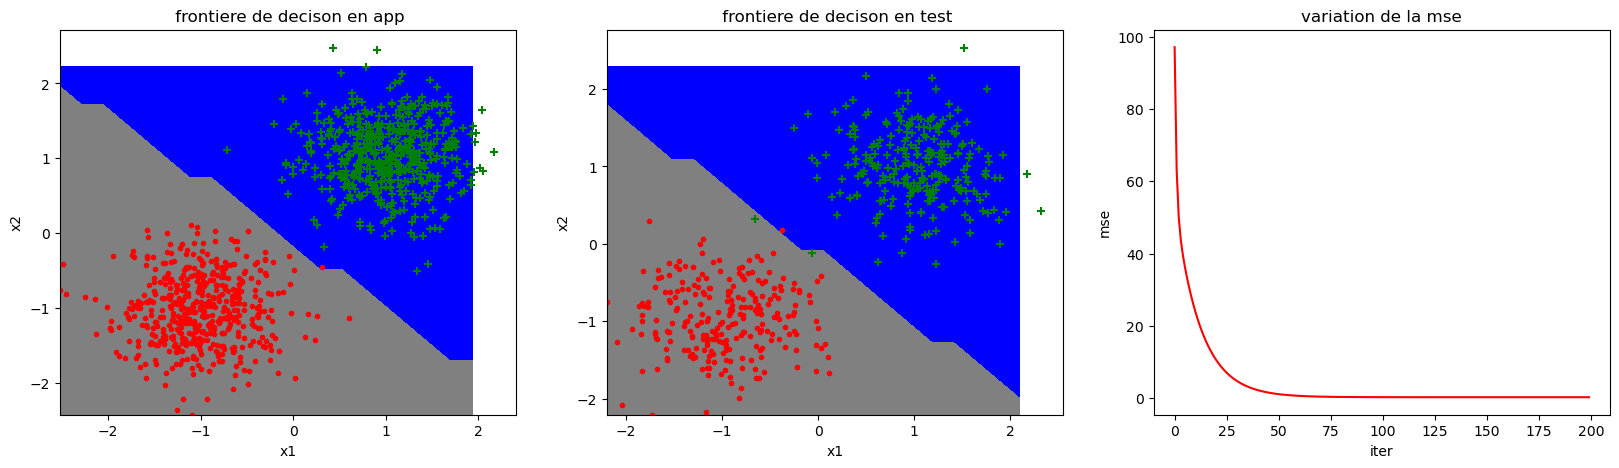

In [14]:
batch = 1000

x_class, y_class = tools.gen_arti(sigma=0.2, nbex=batch, data_type=0, epsilon=0.1)
x_class_t, y_class_t = tools.gen_arti(sigma=0.2, nbex=500, data_type=0, epsilon=0.1)

y_class = np.where(y_class==-1,0,1).reshape((-1,1))
y_class_t = np.where(y_class_t==-1,0,1).reshape((-1,1))

loss_mse = MSELoss()
module_lin = Linear(x_class.shape[1], 1)

iter = 200
hist_loss=[]

for _ in range(iter):

    #forward 
    y_hat = module_lin.forward(x_class)
    
    hist_loss.append(loss_mse.forward(y_class,y_hat).mean())

    #backward 
    loss_back = loss_mse.backward(y_class, y_hat)
    
    delta_lin1 = module_lin.backward_delta(x_class,loss_back)
    module_lin.backward_update_gradient(x_class, loss_back)
    module_lin.update_parameters(gradient_step=1e-4)
    
    module_lin.zero_grad()


y_hat = module_lin.forward(x_class)

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax.flatten()


def predict(x):
    return np.where(module_lin.forward(x)>0.5,1,0)


tools.plot_frontiere(x_class, predict, ax=ax[0])
tools.plot_data(x_class, y_class,ax[0])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title(" frontiere de decison en app")

tools.plot_frontiere(x_class_t, predict, ax=ax[1])
tools.plot_data(x_class_t, y_class_t,ax[1])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title(" frontiere de decison en test")


ax[2].plot(np.arange(iter),hist_loss,color='red',label="la function de cout")
ax[2].set_xlabel("iter")
ax[2].set_ylabel("mse")
ax[2].set_title("variation de la mse")
fig.show()
